<a href="https://colab.research.google.com/github/TNIDHIAN/chronickidney/blob/main/chronickidney2code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/code/jannathmohammed/chronic-kidney-disease1/notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Raw_train_df=pd.read_csv(r"C:\Users\umara\Downloads\kidney_disease_train.csv")
Raw_test_df=pd.read_csv(r"C:\Users\umara\Downloads\kidney_disease_test.csv")

In [ ]:
Raw_test_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


In [ ]:
Raw_test_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


In [ ]:
print(f'Shape of Train Data {Raw_train_df.shape}')
print(f'\nShape of Test Data {Raw_test_df.shape}')

Shape of Train Data (280, 26)

Shape of Test Data (120, 25)


In [ ]:
Raw_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,280.0,202.928571,111.988168,1.000,110.50,202.00,302.25,399.000
age,275.0,51.454545,17.476176,2.000,42.00,55.00,65.00,90.000
bp,271.0,76.051661,14.256289,50.000,70.00,70.00,80.00,180.000
sg,244.0,1.017439,0.005746,1.005,1.01,1.02,1.02,1.025
al,245.0,1.024490,1.375805,0.000,0.00,0.00,2.00,5.000
su,242.0,0.438017,1.073193,0.000,0.00,0.00,0.00,5.000
bgr,247.0,150.186235,77.357144,70.000,100.00,124.00,171.50,490.000
bu,266.0,56.983835,51.456635,10.000,27.25,41.00,64.75,391.000
sc,268.0,3.006157,5.850085,0.400,0.90,1.30,2.80,76.000
sod,213.0,137.255869,11.677123,4.500,135.00,138.00,141.00,163.000


In [ ]:
Raw_train_df.skew()

C:\Users\umara\AppData\Local\Temp\ipykernel_26720\2039430263.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Raw_train_df.skew()


id     -0.056679
age    -0.671129
bp      2.003336
sg     -0.166490
al      1.012426
su      2.528299
bgr     1.964349
bu      2.954937
sc      8.283930
sod    -7.123213
pot     9.860723
hemo   -0.351304
pcv    -0.482163
dtype: float64

In [ ]:
cat_var=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
num_var=['id','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
print(f'Number of Categirical Variables including Label is {len(cat_var)}')
print(f'Number of Numerical Variables including Label is {len(num_var)}')

Number of Categirical Variables including Label is 13
Number of Numerical Variables including Label is 12


In [ ]:
Raw_train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
Raw_train_df[Raw_train_df['wc'].map(lambda x:type(x)==str)].wc.value_counts()

11000    8
9600     8
6700     8
9800     7
7200     6
        ..
10900    1
12200    1
5900     1
5200     1
14600    1
Name: wc, Length: 78, dtype: int64

In [ ]:
Raw_train_df[Raw_train_df['rc'].map(lambda x:type(x)==str)].rc.value_counts()

4.5    10
5.2    10
5.5     8
4.7     8
4.8     8
4.9     8
3.4     7
6.1     7
5.4     6
4.6     6
5.9     6
3.8     6
5.8     5
3.9     5
5.0     5
4.3     5
5.6     5
5.3     5
5.7     5
4.4     4
4.1     4
3.2     4
6.5     3
5.1     3
6.2     3
4.0     3
3.7     3
4.2     3
6.0     3
3.5     3
3.3     3
3.6     3
3.0     2
6.4     2
2.6     2
3.1     2
2.5     1
2.9     1
2.7     1
2.4     1
6.3     1
8.0     1
\t?     1
2.3     1
2.1     1
4       1
3       1
5       1
Name: rc, dtype: int64

In [ ]:
train_df=Raw_train_df.copy()
train_df['wc']=pd.to_numeric(train_df['wc'],errors='coerce')
train_df['rc']=pd.to_numeric(train_df['rc'], errors='coerce')

In [ ]:
train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
train_df.apply(lambda x: x.isna().value_counts()). T

,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


In [ ]:
# Checking for garbage or wrong values in Categorical variables.
for col in cat_var:
    print(f"Values counts for {col} are \n {train_df[col].value_counts()}")

Values counts for sg are 
 1.020    74
1.010    61
1.025    57
1.015    48
1.005     4
Name: sg, dtype: int64
Values counts for al are 
 0.0    139
3.0     29
2.0     29
1.0     29
4.0     18
5.0      1
Name: al, dtype: int64
Values counts for su are 
 0.0    199
1.0     12
2.0     11
3.0     10
4.0      8
5.0      2
Name: su, dtype: int64
Values counts for rbc are 
 normal      144
abnormal     29
Name: rbc, dtype: int64
Values counts for pc are 
 normal      181
abnormal     49
Name: pc, dtype: int64
Values counts for pcc are 
 notpresent    250
present        26
Name: pcc, dtype: int64
Values counts for ba are 
 notpresent    260
present        16
Name: ba, dtype: int64
Values counts for htn are 
 no     177
yes    102
Name: htn, dtype: int64
Values counts for dm are 
 no       175
yes       99
\tno       3
\tyes      2
Name: dm, dtype: int64
Values counts for cad are 
 no      254
yes      23
\tno      2
Name: cad, dtype: int64
Values counts for appet are 
 good    218
poor     62


In [ ]:
#Removing the Extra tab character
train_df['dm']=train_df.dm.replace("\tno","no")
train_df['dm']=train_df.dm.replace("\tyes","yes")

train_df['cad']=train_df.cad.replace("\tno","no")

In [ ]:
#Cross Checking the Replacement
print(train_df.dm.value_counts())
print(train_df.cad.value_counts())

no     178
yes    101
Name: dm, dtype: int64
no     256
yes     23
Name: cad, dtype: int64


In [ ]:
#Missing Values For Each Column (Count in True Column).

train_df.apply(lambda x: x.isna().value_counts()). T

,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


In [ ]:
for col in num_var:
    print(f'Imputing for {col} with {train_df[col].median()}')
    train_df[col]=train_df[col].fillna(train_df[col].median())

Imputing for id with 202.0
Imputing for age with 55.0
Imputing for bp with 70.0
Imputing for bgr with 124.0
Imputing for bu with 41.0
Imputing for sc with 1.3
Imputing for sod with 138.0
Imputing for pot with 4.4
Imputing for hemo with 12.7
Imputing for pcv with 41.0
Imputing for wc with 7900.0
Imputing for rc with 4.8


In [ ]:
for col in cat_var:
    print(f'Imputing for {col} with {train_df[col].mode()[0]}')
    train_df[col]=train_df[col].fillna(train_df[col].mode()[0])

Imputing for sg with 1.02
Imputing for al with 0.0
Imputing for su with 0.0
Imputing for rbc with normal
Imputing for pc with normal
Imputing for pcc with notpresent
Imputing for ba with notpresent
Imputing for htn with no
Imputing for dm with no
Imputing for cad with no
Imputing for appet with good
Imputing for pe with no
Imputing for ane with no


In [ ]:
#Cross checking for any more Missing Values For Each Column (Count in True Column).

train_df.apply(lambda x: x.isna().value_counts()). T

,False
id,280
age,280
bp,280
sg,280
al,280
su,280
rbc,280
pc,280
pcc,280
ba,280


In [ ]:
train_num_df=train_df[num_var].copy()

In [ ]:
train_num_df.head()

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,157,62.0,70.0,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900.0,3.9
1,109,54.0,70.0,233.0,50.1,1.9,138.0,4.4,11.7,41.0,7900.0,4.8
2,17,47.0,80.0,114.0,87.0,5.2,139.0,3.7,12.1,41.0,7900.0,4.8
3,347,43.0,60.0,108.0,25.0,1.0,144.0,5.0,17.8,43.0,7200.0,5.5
4,24,42.0,100.0,124.0,50.0,1.4,129.0,4.0,11.1,39.0,8300.0,4.6


In [ ]:
train_num_df.shape

(280, 12)

In [ ]:
#Outlier analysis -larger deviations from the mean value

In [ ]:
from scipy.stats import zscore
train_num_zscore=train_num_df.apply(zscore)

In [ ]:
train_num_zscore[~(np.abs(train_num_zscore) < 3).all(axis=1)].shape

(25, 12)

In [ ]:
train_num_zscore[~(np.abs(train_num_zscore) < 3).all(axis=1)]

,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
11,-0.518200,0.316991,1.007324,-0.316445,5.297192,1.759003,-1.124757,0.039634,-1.706351,-1.949834,-1.525581,-1.716211
30,-1.761625,0.953039,-0.417175,-0.645219,-0.043536,3.681036,-3.288900,-0.200963,-0.058065,-0.440285,-0.124303,0.074173
34,-1.725843,-0.087766,-1.129424,4.697359,-0.023608,0.186431,0.055685,-0.080664,-1.181896,-1.446651,-0.124303,0.074173
36,-0.893911,1.415620,-0.417175,1.080845,3.204743,1.269759,0.055685,-0.080664,-0.882208,-0.440285,1.693572,-0.641981
57,0.313732,1.184330,1.719573,0.738372,3.683017,1.828895,-1.026387,0.039634,-1.181896,-1.446651,-0.124303,0.074173
62,-0.723947,-1.012927,-0.417175,-0.316445,3.244599,1.619219,-0.731277,-0.261112,-2.455572,0.188694,-0.124303,0.074173
64,-1.215949,-0.376879,0.295075,3.806929,-0.302601,-0.285341,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
65,-0.044089,0.432637,1.719573,1.437017,-0.322529,0.046647,-0.042686,0.009559,-0.507597,-1.195060,6.882090,-1.000057
73,-1.045985,0.259169,0.295075,3.669940,-0.382313,-0.180503,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
83,0.072203,0.143524,3.144071,-0.604122,-0.760947,-0.302814,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173


In [ ]:
from scipy import stats
for col in num_var:
    print(f'Imputing for {col} with {train_df[col].median()}')
    train_df.loc[(np.abs(stats.zscore(train_num_df[col])) >= 3), col] = train_df[col].median()

Imputing for id with 202.0
Imputing for age with 55.0
Imputing for bp with 70.0
Imputing for bgr with 124.0
Imputing for bu with 41.0
Imputing for sc with 1.3
Imputing for sod with 138.0
Imputing for pot with 4.4
Imputing for hemo with 12.7
Imputing for pcv with 41.0
Imputing for wc with 7900.0
Imputing for rc with 4.8


In [ ]:
train_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200.0,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,ckd


In [ ]:
train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
cat_var

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [ ]:
# Creating a Dictionary to Replace the Non Numerical values with Numeric for the Categorical variables identified above.
cat_nom_dict = {"rbc":     {"normal": 1, "abnormal": 0},
                "pc":     {"normal": 1, "abnormal": 0},
                "pcc":     {"present": 1, "notpresent": 0},
                "ba":     {"present": 1, "notpresent": 0},
                "htn":     {"yes": 1, "no": 0},
                "dm":     {"yes": 1, "no": 0},
                "cad":     {"yes": 1, "no": 0},
                "pe":     {"yes": 1, "no": 0},
                "ane":     {"yes": 1, "no": 0},
                "appet":     {"good": 1, "poor": 0},
                "classification":     {"ckd": 1, "notckd": 0}
}

In [ ]:
cat_nom_dict

{'rbc': {'normal': 1, 'abnormal': 0},
 'pc': {'normal': 1, 'abnormal': 0},
 'pcc': {'present': 1, 'notpresent': 0},
 'ba': {'present': 1, 'notpresent': 0},
 'htn': {'yes': 1, 'no': 0},
 'dm': {'yes': 1, 'no': 0},
 'cad': {'yes': 1, 'no': 0},
 'pe': {'yes': 1, 'no': 0},
 'ane': {'yes': 1, 'no': 0},
 'appet': {'good': 1, 'poor': 0},
 'classification': {'ckd': 1, 'notckd': 0}}

In [ ]:
train_df.replace(cat_nom_dict, inplace=True)

In [ ]:
train_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,1,0,0,0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,109,54.0,70.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,17,47.0,80.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,347,43.0,60.0,1.025,0.0,0.0,1,1,0,0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,24,42.0,100.0,1.015,4.0,0.0,1,0,0,1,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


In [ ]:
train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [ ]:
train_df.drop('id',axis=1,inplace=True)

In [ ]:
train_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


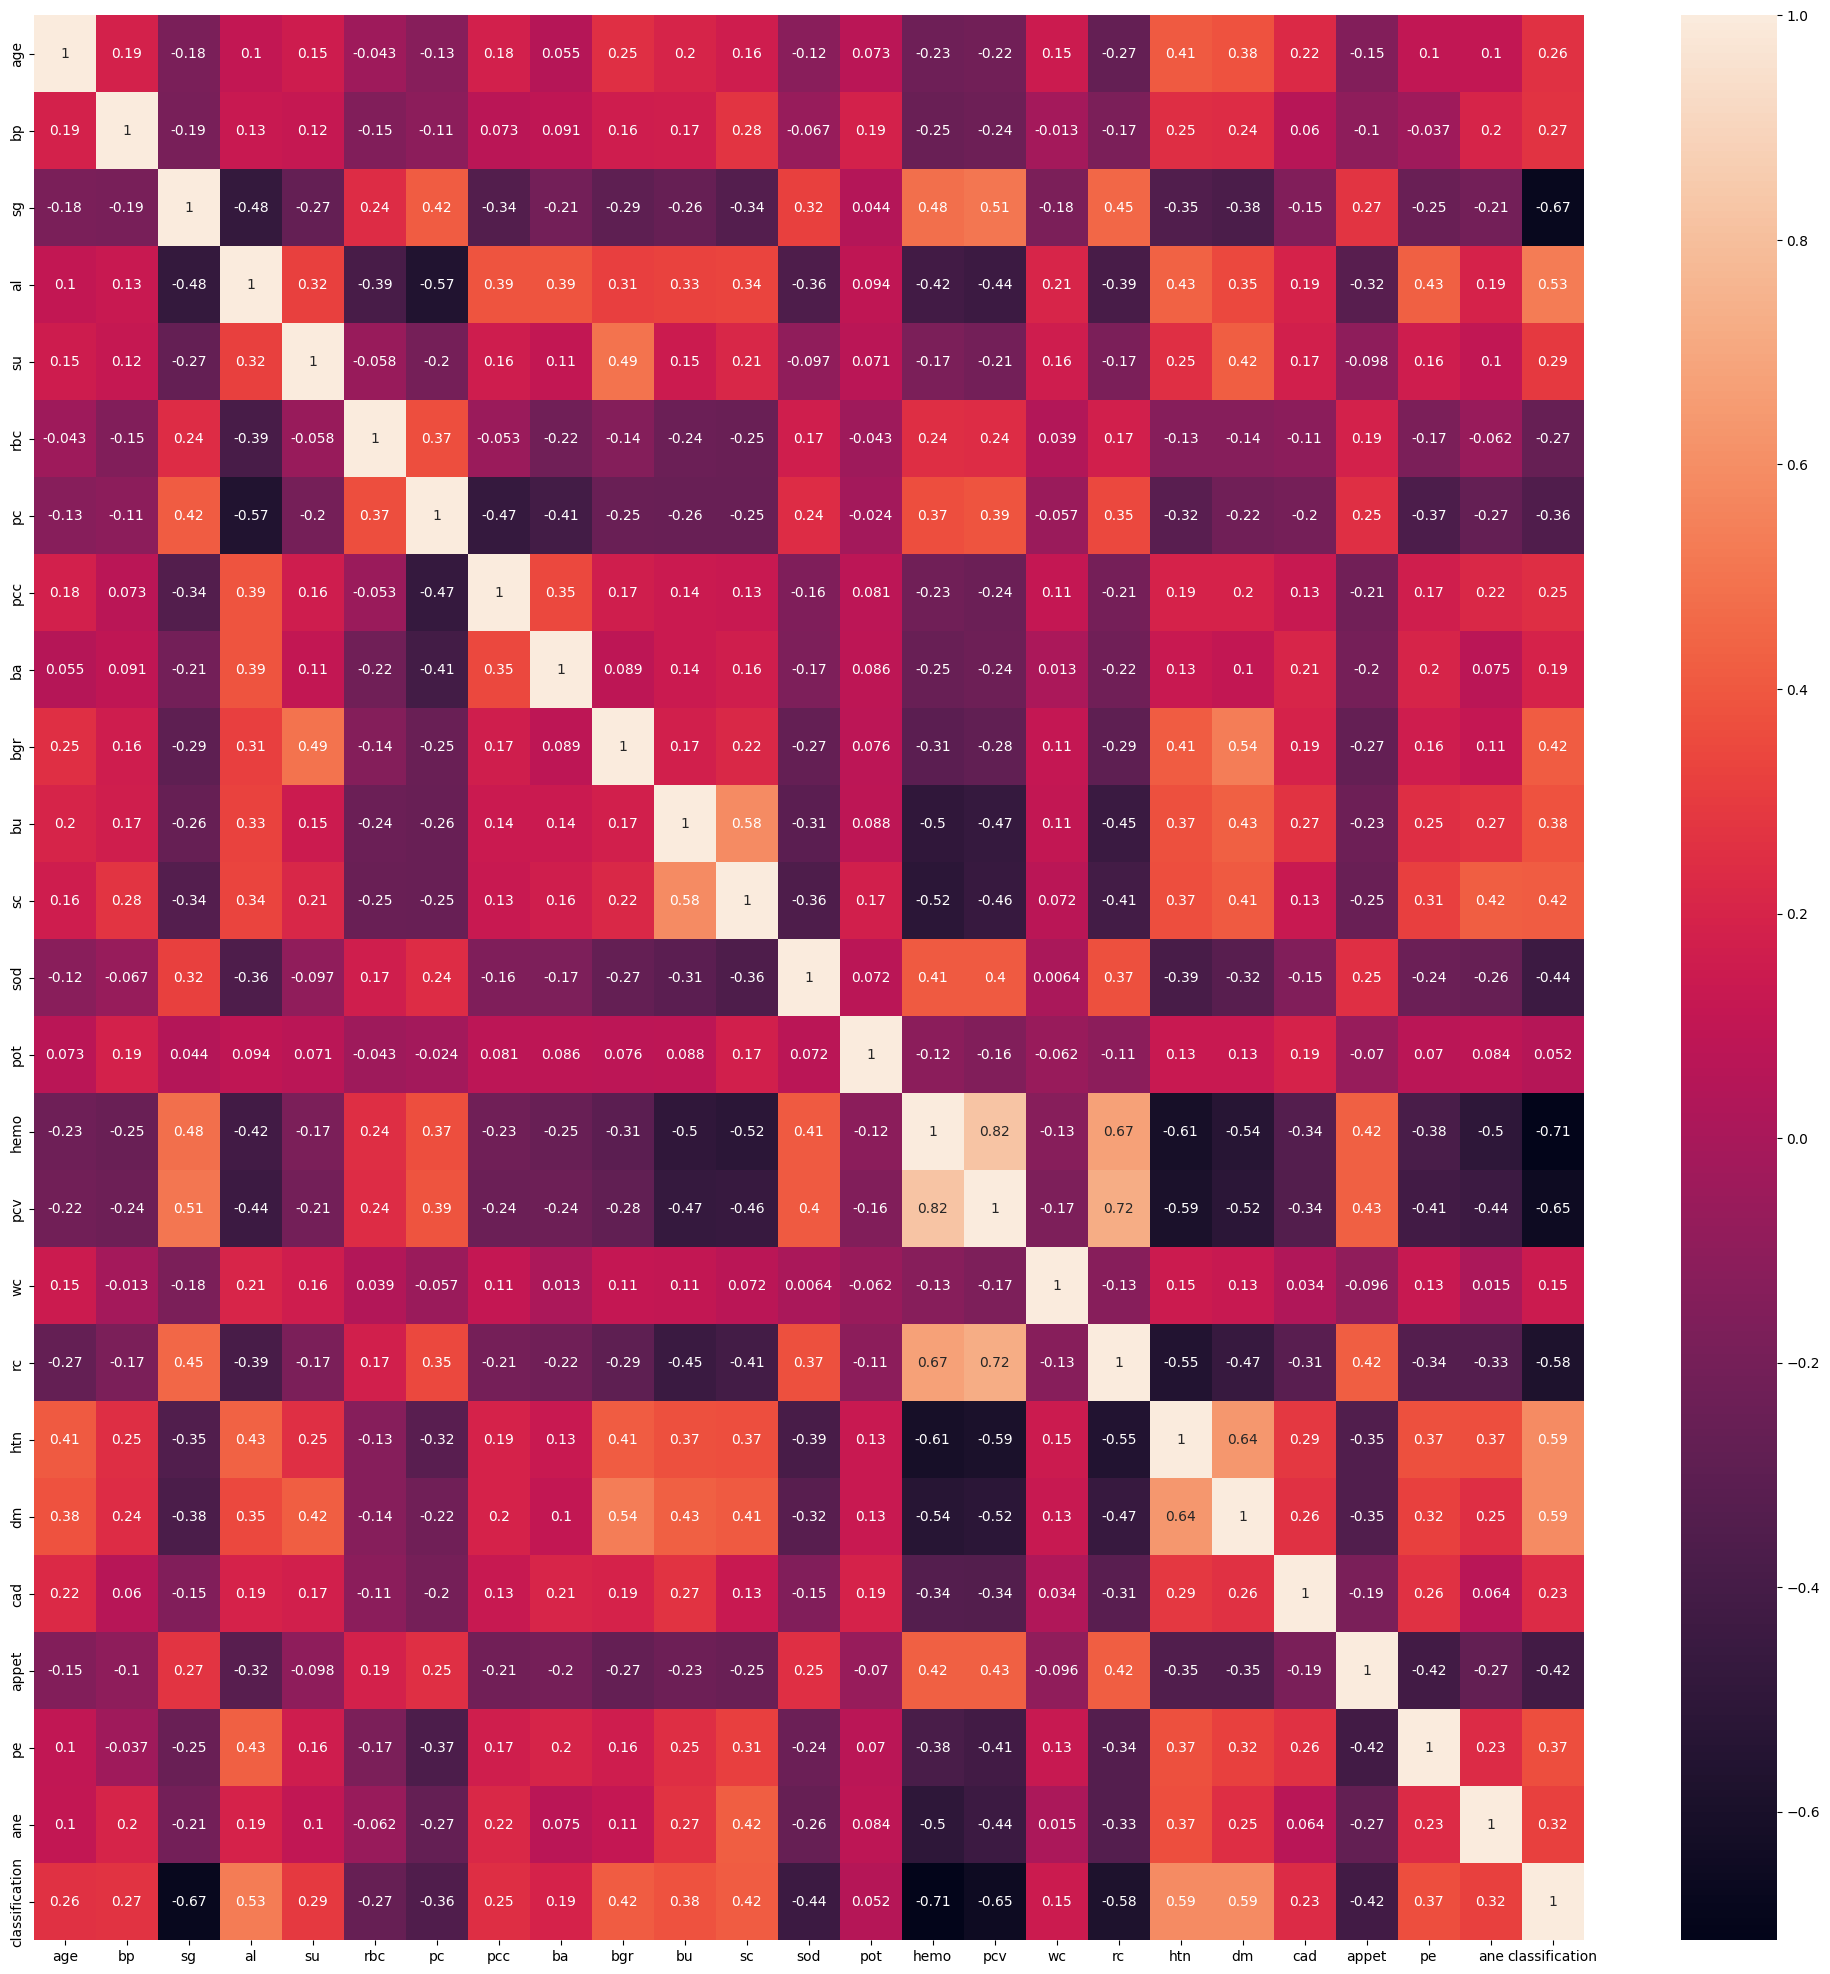

In [ ]:
# Plotting Heat map with Co Relation numbers between each Features. Degault will be Pearson Co relation co efficient
plt.figure(figsize=(25, 25))
Train_df_corr = train_df.corr()
sns.heatmap(Train_df_corr,
            xticklabels = Train_df_corr.columns.values,
            yticklabels = Train_df_corr.columns.values,
            annot = True);

In [ ]:
drop_feat=['hemo','pcv','htn']
train_df.drop(drop_feat,axis=1,inplace=True)

In [ ]:
train_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,wc,rc,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,136.0,4.7,7900.0,3.9,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,138.0,4.4,7900.0,4.8,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,139.0,3.7,7900.0,4.8,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,144.0,5.0,7200.0,5.5,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,129.0,4.0,8300.0,4.6,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = train_df['classification']
X = train_df.drop(['classification'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
norm = MinMaxScaler().fit(X_train)

In [ ]:
X_train_norm = norm.transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.98      0.90      0.94        49

    accuracy                           0.93        84
   macro avg       0.92      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



In [ ]:
from mealpy.bio_based import SMA

In [ ]:
from sklearn import  metrics

In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    LR=LogisticRegression()
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    LR.fit(X_train, y_train)
    # Make the predictions
    y_predict = LR.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = SMA.BaseSMA(epoch=1, pop_size=10)
model.solve(problem)

c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2023/12/24 07:04:44 AM, INFO, mealpy.bio_based.SMA.BaseSMA: Solving single objective optimization problem.
c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.928982173

c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.933618233

(array([8.8179330e-02, 2.3639274e+02]), 0.9285714285714286)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=23)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        35
           1       0.91      0.98      0.94        49

    accuracy                           0.93        84
   macro avg       0.94      0.92      0.93        84
weighted avg       0.93      0.93      0.93        84



In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    dt = DecisionTreeClassifier(random_state=23)
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    dt.fit(X_train, y_train)
    # Make the predictions
    y_predict = dt.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = SMA.BaseSMA(epoch=1, pop_size=10)
model.solve(problem)

2023/12/24 07:07:02 AM, INFO, mealpy.bio_based.SMA.BaseSMA: Solving single objective optimization problem.


Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.927807486

2023/12/24 07:07:02 AM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 1, Current best: 0.9285714285714286, Global best: 0.9285714285714286, Runtime: 0.09861 seconds


F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161


(array([ 0.        , 63.70651323]), 0.9285714285714286)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)
y_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        49

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    rfc= RandomForestClassifier(n_estimators = 100, random_state = 1)
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    rfc.fit(X_train, y_train)
    # Make the predictions
    y_predict = rfc.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = SMA.BaseSMA(epoch=1, pop_size=10)
model.solve(problem)

2023/12/24 07:11:10 AM, INFO, mealpy.bio_based.SMA.BaseSMA: Solving single objective optimization problem.


Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749


2023/12/24 07:11:12 AM, INFO, mealpy.bio_based.SMA.BaseSMA: >Problem: P, Epoch: 1, Current best: 0.9880952380952381, Global best: 0.9880952380952381, Runtime: 1.26014 seconds


Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749


(array([  0.        , 141.92907053]), 0.9880952380952381)

In [ ]:
from mealpy import GWO

In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    rfc= RandomForestClassifier(n_estimators = 100, random_state = 1)
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    rfc.fit(X_train, y_train)
    # Make the predictions
    y_predict = rfc.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = GWO.OriginalGWO(epoch=1, pop_size=10)
model.solve(problem)

2023/12/24 07:14:05 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749


ZeroDivisionError: division by zero

In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    dt = DecisionTreeClassifier(random_state=23)
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    dt.fit(X_train, y_train)
    # Make the predictions
    y_predict = dt.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = GWO.OriginalGWO(epoch=1, pop_size=10)
model.solve(problem)

2023/12/24 07:15:48 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.927807486

ZeroDivisionError: division by zero

In [ ]:
from mealpy import WOA

In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    LR=LogisticRegression()
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    LR.fit(X_train, y_train)
    # Make the predictions
    y_predict = LR.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = WOA.HI_WOA(epoch=1, pop_size=10, feedback_max = 2)
model.solve(problem)

c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2023/12/24 10:32:35 AM, INFO, mealpy.swarm_based.WOA.HI_WOA: Solving single objective optimization problem.
c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.928982173

c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\umara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.928982173

2023/12/24 10:32:36 AM, INFO, mealpy.swarm_based.WOA.HI_WOA: >Problem: P, Epoch: 1, Current best: 0.9285714285714286, Global best: 0.9285714285714286, Runtime: 0.22913 seconds


Recall Score : 0.9285714285714286
Precision Score : 0.9336182336182336
F1 Score : 0.9289821736630247


(array([  0.94619056, 369.76551558]), 0.9285714285714286)

In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    dt = DecisionTreeClassifier(random_state=23)
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    dt.fit(X_train, y_train)
    # Make the predictions
    y_predict = dt.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = WOA.HI_WOA(epoch=1, pop_size=10, feedback_max = 2)
model.solve(problem)

2023/12/24 10:33:57 AM, INFO, mealpy.swarm_based.WOA.HI_WOA: Solving single objective optimization problem.


Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.927807486

2023/12/24 10:33:57 AM, INFO, mealpy.swarm_based.WOA.HI_WOA: >Problem: P, Epoch: 1, Current best: 0.9285714285714286, Global best: 0.9285714285714286, Runtime: 0.12315 seconds


Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161
Model Accuracy : 92.8571
Recall Score : 0.9285714285714286
Precision Score : 0.9315276932440658
F1 Score : 0.9278074866310161


(array([  1.71415366, 309.85586571]), 0.9285714285714286)

In [ ]:
def fitness_function(solution):
    # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
    #                       2 - 2.99 ==> 2
    #                       3 - 3.99 ==> 3      ==> sigmoid
    rfc= RandomForestClassifier(n_estimators = 100, random_state = 1)
    #dtc=DecisionTreeClassifier(n_estimators=100)
    # Fit the model
    rfc.fit(X_train, y_train)
    # Make the predictions
    y_predict = rfc.predict(X_test)
    #Measure the performance
    acc_per2 = metrics.accuracy_score(y_test, y_predict)
    print('Model Accuracy : '+ str(round(acc_per2*100,4)))
    print("Recall Score :",metrics.recall_score(y_test,  y_predict, average='weighted'))
    print("Precision Score :",metrics.precision_score(y_test,  y_predict, average='weighted'))
    print("F1 Score :",metrics.f1_score(y_test, y_predict, average='weighted'))

    return metrics.accuracy_score(y_test, y_predict)

problem = {
    "fit_func": fitness_function,
    "lb": [0, 0.1],
    "ub": [3.99, 1000],
    "minmax": "max",
}

model = WOA.HI_WOA(epoch=1, pop_size=10, feedback_max = 2)
model.solve(problem)

2023/12/24 10:35:12 AM, INFO, mealpy.swarm_based.WOA.HI_WOA: Solving single objective optimization problem.


Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749
Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749


2023/12/24 10:35:14 AM, INFO, mealpy.swarm_based.WOA.HI_WOA: >Problem: P, Epoch: 1, Current best: 0.9880952380952381, Global best: 0.9880952380952381, Runtime: 1.28606 seconds


Model Accuracy : 98.8095
Recall Score : 0.9880952380952381
Precision Score : 0.9883333333333333
F1 Score : 0.988069096764749


(array([  1.38641068, 911.09447565]), 0.9880952380952381)